<h1>House Prices - Advanced Regression Techniques</h1>
<h2>1. Introducción</h2>
<h3>Descipción</h3>
<p>En este proyecto, se aplicarán técnicas avanzadas de regresión para desarrollar un modelo que prediga con precisión el precio de venta de viviendas, utilizando un conjunto de datos con 79 variables explicativas que detallan diversas características de las casas en Ames, Iowa.</p>
<h3>Cargando los datos</h3>

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [82]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

<h2>2. Exploración de los Datos</h2>
<h3>Visualizaciones Iniciales</h3>

In [4]:
print(train_df.shape)
train_df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


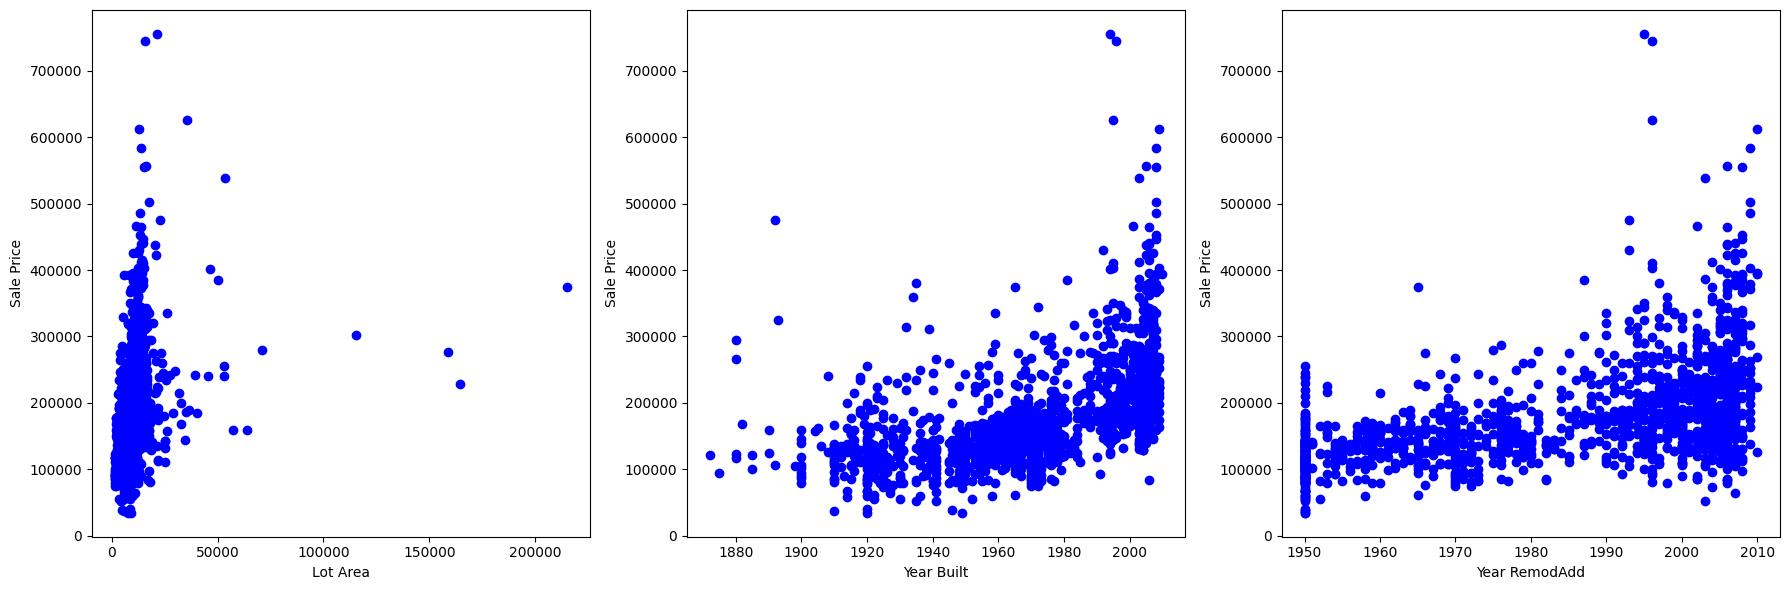

In [12]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(train_df["LotArea"], train_df["SalePrice"], color="blue")
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")

plt.subplot(1, 3, 2)
plt.scatter(train_df["YearBuilt"], train_df["SalePrice"], color="blue")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")

plt.subplot(1, 3, 3)
plt.scatter(train_df["YearRemodAdd"], train_df["SalePrice"], color="blue")
plt.xlabel("Year RemodAdd")
plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

<h2>3. Preprocesamiento y Limpieza de Datos</h2>
<h3>Selección de Datos</h3>

In [50]:
trainset_df = train_df[["LotArea", "Neighborhood", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "GrLivArea", "TotalBsmtSF", "GarageArea", "GarageCars", "ExterQual", "KitchenQual", "FullBath", "Fireplaces", "SalePrice"]]
trainset_df.head()

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,TotalBsmtSF,GarageArea,GarageCars,ExterQual,KitchenQual,FullBath,Fireplaces,SalePrice
0,8450,CollgCr,7,5,2003,2003,1710,856,548,2,Gd,Gd,2,0,208500
1,9600,Veenker,6,8,1976,1976,1262,1262,460,2,TA,TA,2,1,181500
2,11250,CollgCr,7,5,2001,2002,1786,920,608,2,Gd,Gd,2,1,223500
3,9550,Crawfor,7,5,1915,1970,1717,756,642,3,TA,Gd,1,1,140000
4,14260,NoRidge,8,5,2000,2000,2198,1145,836,3,Gd,Gd,2,1,250000


In [36]:
trainset_df.isna().sum()

LotArea         0
Neighborhood    0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
GrLivArea       0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
ExterQual       0
KitchenQual     0
FullBath        0
Fireplaces      0
SalePrice       0
dtype: int64

<h3>Transformación de Datos</h3>
<p>Se reemplaza los valores categóricos con valores numéricos.</p>
<p>En el caso de "ExterQual" y "KitchenQual" se han reemplazado los valores de acuerdo a su importancia Excellent, Good, Typical/Average, Fair, Poor.</p>

In [51]:
le_Neighborhood = preprocessing.LabelEncoder()
le_Neighborhood.fit(["Blmngtn","Blueste","BrDale","BrkSide","ClearCr","CollgCr","Crawfor","Edwards","Gilbert","IDOTRR","MeadowV","Mitchel","NAmes","NoRidge","NPkVill","NridgHt","NWAmes","OldTown","SWISU","Sawyer","SawyerW","Somerst","StoneBr","Timber","Veenker"])
trainset_df.loc[:,"Neighborhood"] = le_Neighborhood.transform(trainset_df.loc[:,"Neighborhood"])

quality_map = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
trainset_df.loc[:,"ExterQual"] = trainset_df["ExterQual"].map(quality_map)
trainset_df.loc[:,"KitchenQual"] = trainset_df["KitchenQual"].map(quality_map)

trainset_df.head()

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,TotalBsmtSF,GarageArea,GarageCars,ExterQual,KitchenQual,FullBath,Fireplaces,SalePrice
0,8450,5,7,5,2003,2003,1710,856,548,2,4,4,2,0,208500
1,9600,24,6,8,1976,1976,1262,1262,460,2,3,3,2,1,181500
2,11250,5,7,5,2001,2002,1786,920,608,2,4,4,2,1,223500
3,9550,6,7,5,1915,1970,1717,756,642,3,3,4,1,1,140000
4,14260,15,8,5,2000,2000,2198,1145,836,3,4,4,2,1,250000


<h3>División de Datos</h3>

In [65]:
x_trainset = trainset_df[["LotArea", "Neighborhood", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "GrLivArea", "TotalBsmtSF", "GarageArea", "GarageCars", "ExterQual", "KitchenQual", "FullBath", "Fireplaces"]].to_numpy()
y_trainset = trainset_df["SalePrice"]

<h2>4. Modelado</h2>
<h3>Selección de Modelo<h3>

In [66]:
house_regression_tree = DecisionTreeRegressor(criterion='squared_error')

<h3>Entrenamiento de modelos</h3>

In [67]:
house_regression_tree.fit(x_trainset, y_trainset)

DecisionTreeRegressor()

<h2>5. Predicciones y Generación de Resultados</h2>
<h3>Predicciones finales<h3>

In [84]:
testset_df = test_df[["LotArea", "Neighborhood", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "GrLivArea", "TotalBsmtSF", "GarageArea", "GarageCars", "ExterQual", "KitchenQual", "FullBath", "Fireplaces"]]

testset_df.loc[:,"Neighborhood"] = le_Neighborhood.transform(testset_df.loc[:,"Neighborhood"])

testset_df.loc[:,"ExterQual"] = testset_df["ExterQual"].map(quality_map)
testset_df.loc[:,"KitchenQual"] = testset_df["KitchenQual"].map(quality_map)

x_testset = testset_df.to_numpy()
x_testset

array([[11622, 12, 5, ..., 3.0, 1, 0],
       [14267, 12, 6, ..., 4.0, 1, 0],
       [13830, 8, 5, ..., 3.0, 2, 1],
       ...,
       [20000, 11, 5, ..., 3.0, 1, 1],
       [10441, 11, 5, ..., 3.0, 1, 0],
       [9627, 11, 7, ..., 3.0, 2, 1]], dtype=object)

In [85]:
prediction = house_regression_tree.predict(x_testset)
prediction

array([128500., 145000., 172500., ..., 162000.,  93500., 190000.])

<h3>Archivos de Salida<h3>

In [87]:
predicted_test_df = test_df.copy()
predicted_test_df["SalePrice"] = prediction

predicted_test_df[["Id","SalePrice"]].to_csv("results/predictions.csv",index=False)